In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 모델을 클래스 형식으로 선언합니다.

In [9]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(784,100)
        self.fc2 = nn.Linear(100,100)
        self.fc3 = nn.Linear(100,10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        # F.cross_entropy = F.log_softmax + F.nll_loss
        # 뒤에서 cross_entropy를 사용하려면, 여기서 softmax 빼야됩니다.
        result = F.log_softmax(x, dim=1) 
        return result

## train_dataset, test_dataset을 생성합니다.

In [10]:
data_path = 'data'
if not os.path.exists(data_path):
    os.makedirs(data_path)
    
transform = transforms.Compose([transforms.ToTensor(), # 이미지를 텐서로 변경하고
                                transforms.Normalize((0.1307,), # 이미지를 0.1307, 0.3081값으로 normalize
                                                     (0.3081,))
                               ])

trn_dset = datasets.MNIST(root=data_path, train=True, transform=transform, download=True)
tst_dset = datasets.MNIST(root=data_path, train=False, transform=transform, download=False)

## 위에서 생성된 dataset으로 dataloader를 만듭니다.

In [11]:
batch_size = 2**8 # 512
trn_loader = DataLoader(trn_dset, batch_size = batch_size, shuffle=True, drop_last=False)
tst_loader = DataLoader(tst_dset, batch_size = batch_size, shuffle=False, drop_last=False)

## 모델을 생성하고 이 모델을 gpu에서 사용할지 cpu에서 사용할지 결정합니다.

In [12]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')
print(device)

model = MyNet()
model = model.to(device)

cuda:0


## optimizer를 설정합니다.

In [13]:
my_opt = optim.Adam(params = model.parameters(), lr = 2e-4)

## 학습해 볼까요?

In [1]:
epoch = 10 
for epoch in range(epoch):
    model.train()
    for batch_idx, (x_batch, y_batch) in enumerate(trn_loader):
        x_batch = x_batch.reshape(-1, 786).to(device)
        y_batch = y_batch.to(device)
        
        # optimizer
        optimier.zero_grad()
        
        # forward 
        pred = model(x_batch)
        
        # loss 
        loss = F.nllloss(pred, y_batch)
        
        # update
        loss.backward()
        optimizer.step()
        
    model.eval()
    with torch.no_grad():
        for batch_idx, (x, y) in enumerate(tsn_loader):
            x = x.reshape(-1, 768).to(device)
            y = y.to(device)
            
            # forward 
            pred = model(x)
            
            # loss
            pred = np.argmax(pred, axis=1)
            loss = F.nllloss(pred, y)
        
        

NameError: name 'model' is not defined

In [14]:
n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for batch_idx, (x_batch, y_batch) in enumerate(trn_loader):
        x_batch = x_batch.reshape(-1,784).to(device)
        y_batch = y_batch.to(device)
        my_opt.zero_grad()
        y_batch_prob = model(x_batch)
        loss = F.nll_loss(y_batch_prob, y_batch)
        loss.backward()
        my_opt.step()
        if (batch_idx+1)%100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, 
                                                                           batch_idx * len(x_batch), 
                                                                           len(trn_loader.dataset),
                                                                           100 * batch_idx / len(trn_loader),
                                                                           loss.item()))
    # 매 epoch이 끝날때 결과 찍기
    print('Train Epoch: {} [{}/{} (100%)]\tLoss: {:.6f}'.format(epoch, 
                                                                   len(trn_loader.dataset), 
                                                                   len(trn_loader.dataset),
                                                                loss.item()))
    model.eval()
    y_pred_list = []
    y_real_list = []
    tst_loss = 0
    with torch.no_grad():
        for batch_idx, (x_batch, y_batch) in enumerate(tst_loader):
            x_batch = x_batch.reshape(-1,784).to(device)
            y_batch = y_batch.to(device)
            y_batch_prob = model(x_batch)
            y_batch_pred = np.argmax(y_batch_prob.cpu(), axis=1)
#             print(y_batch_pred)
#             print(y_batch)
#             y_batch_pred = y_batch_prob.argmax(dim=1, keepdim=True)
            loss = F.nll_loss(y_batch_prob, y_batch, reduction='sum')
            tst_loss += loss
            
            y_pred_list.append(y_batch_pred.detach().numpy())
            y_real_list.append(y_batch.cpu().numpy())
            
        y_real = np.concatenate([x for x in y_real_list], axis=0)
        y_pred = np.concatenate([x for x in y_pred_list], axis=0)
        tst_loss /= y_real.shape[0]
        correct  = np.sum(y_real == y_pred)
        accuracy = 100*correct / len(tst_loader.dataset)
        
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(tst_loss, 
                                                                                     correct, 
                                                                                     len(tst_loader.dataset),
                                                                                     accuracy))

Train Epoch: 0 [25344/60000 (42%)]	Loss: 0.562073
Train Epoch: 0 [50944/60000 (85%)]	Loss: 0.339318
Train Epoch: 0 [60000/60000 (100%)]	Loss: 0.393228

Test set: Average loss: 0.3256, Accuracy: 9104/10000 (91%)

Train Epoch: 1 [25344/60000 (42%)]	Loss: 0.381813
Train Epoch: 1 [50944/60000 (85%)]	Loss: 0.284295
Train Epoch: 1 [60000/60000 (100%)]	Loss: 0.204757

Test set: Average loss: 0.2516, Accuracy: 9276/10000 (93%)

Train Epoch: 2 [25344/60000 (42%)]	Loss: 0.248221
Train Epoch: 2 [50944/60000 (85%)]	Loss: 0.303129
Train Epoch: 2 [60000/60000 (100%)]	Loss: 0.259247

Test set: Average loss: 0.2146, Accuracy: 9374/10000 (94%)

Train Epoch: 3 [25344/60000 (42%)]	Loss: 0.223804
Train Epoch: 3 [50944/60000 (85%)]	Loss: 0.174606
Train Epoch: 3 [60000/60000 (100%)]	Loss: 0.213114

Test set: Average loss: 0.1867, Accuracy: 9448/10000 (94%)

Train Epoch: 4 [25344/60000 (42%)]	Loss: 0.196686
Train Epoch: 4 [50944/60000 (85%)]	Loss: 0.234846
Train Epoch: 4 [60000/60000 (100%)]	Loss: 0.215092



# 여러 optimizer에 대해 비교해볼까요?

In [15]:
batch_size = 2**8
trn_loader = DataLoader(trn_dset, batch_size = batch_size, shuffle=True, drop_last=False)
tst_loader = DataLoader(tst_dset, batch_size = batch_size, shuffle=False, drop_last=False)

In [16]:
opt_list = ['SGD', 'AdaGrad', 'RMSProp', 'Adam']
model_dict    = dict()
trn_loss_dict = dict()
tst_loss_dict = dict()
opt_dict      = dict()
accuracy_dict = dict()

for opt in opt_list:
    model_dict[opt]    = MyNet().to(device)
    trn_loss_dict[opt] = list()
    tst_loss_dict[opt] = list()
    accuracy_dict[opt] = list()

opt_dict['SGD'] = optim.SGD(model_dict['SGD'].parameters(), lr=2e-4)
opt_dict['AdaGrad'] = optim.Adagrad(model_dict['AdaGrad'].parameters(), lr=2e-4)
opt_dict['RMSProp'] = optim.RMSprop(model_dict['RMSProp'].parameters(), lr=2e-4)
opt_dict['Adam'] = optim.Adam(model_dict['Adam'].parameters(), lr=2e-4)

In [17]:
n_epochs = 10

for opt_name, optimizer in opt_dict.items():
    for epoch in range(n_epochs):
        model_dict[opt_name].train()
        total_trn_loss = 0
        for batch_idx, (x_batch, y_batch) in enumerate(trn_loader):
            x_batch = x_batch.reshape(-1,784).to(device)
            y_batch = y_batch.to(device)
            opt_dict[opt_name].zero_grad()
            y_batch_prob = model_dict[opt_name](x_batch)
            trn_loss = F.nll_loss(y_batch_prob, y_batch)
            trn_loss.backward()
            total_trn_loss += trn_loss.item() * y_batch.shape[0]
            opt_dict[opt_name].step()
        trn_loss_dict[opt_name].append(total_trn_loss/len(trn_loader.dataset))
        
        
        
        model_dict[opt_name].eval()
        total_tst_loss=0
        correct = 0
        with torch.no_grad():
            for batch_idx, (x_batch, y_batch) in enumerate(tst_loader):
                x_batch = x_batch.reshape(-1,784).to(device)
                y_batch = y_batch.to(device)
                y_batch_prob = model_dict[opt_name](x_batch)
                y_batch_pred = torch.argmax(y_batch_prob, axis=1)
                tst_loss = F.nll_loss(y_batch_prob, y_batch)
                total_tst_loss += tst_loss.item() * y_batch.shape[0]
                correct += np.sum(y_batch.cpu().numpy() == y_batch_pred.cpu().numpy())
        tst_loss_dict[opt_name].append(total_tst_loss / len(tst_loader.dataset))
        accuracy_dict[opt_name].append(correct / len(tst_loader.dataset))
        
        # 매 epoch이 끝날때 결과 찍기
        print('Optimizer: {}, Epoch: {} \t Trn Loss: {:.6f}'.format(opt_name, epoch, 
                                                                    total_trn_loss/len(trn_loader.dataset)))
        
        print('Optimizer: {}, Epoch: {} \t Tst Loss: {:.6f}, Accuracy: {:.2f}%'.format(opt_name, epoch, 
                                                                                       total_tst_loss/len(tst_loader.dataset), 
                                                                                       100*correct/len(tst_loader.dataset)))
    

Optimizer: SGD, Epoch: 0 	 Trn Loss: 2.310599
Optimizer: SGD, Epoch: 0 	 Tst Loss: 2.303981, Accuracy: 11.32%
Optimizer: SGD, Epoch: 1 	 Trn Loss: 2.300372
Optimizer: SGD, Epoch: 1 	 Tst Loss: 2.293697, Accuracy: 12.47%
Optimizer: SGD, Epoch: 2 	 Trn Loss: 2.290409
Optimizer: SGD, Epoch: 2 	 Tst Loss: 2.283630, Accuracy: 13.73%
Optimizer: SGD, Epoch: 3 	 Trn Loss: 2.280602
Optimizer: SGD, Epoch: 3 	 Tst Loss: 2.273658, Accuracy: 15.11%
Optimizer: SGD, Epoch: 4 	 Trn Loss: 2.270833
Optimizer: SGD, Epoch: 4 	 Tst Loss: 2.263625, Accuracy: 16.56%
Optimizer: SGD, Epoch: 5 	 Trn Loss: 2.260947
Optimizer: SGD, Epoch: 5 	 Tst Loss: 2.253382, Accuracy: 18.48%
Optimizer: SGD, Epoch: 6 	 Trn Loss: 2.250797
Optimizer: SGD, Epoch: 6 	 Tst Loss: 2.242818, Accuracy: 20.81%
Optimizer: SGD, Epoch: 7 	 Trn Loss: 2.240257
Optimizer: SGD, Epoch: 7 	 Tst Loss: 2.231799, Accuracy: 23.52%
Optimizer: SGD, Epoch: 8 	 Trn Loss: 2.229197
Optimizer: SGD, Epoch: 8 	 Tst Loss: 2.220171, Accuracy: 25.92%
Optimizer:

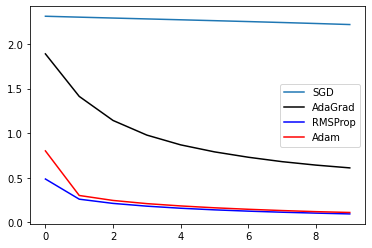

In [18]:
plt.plot(trn_loss_dict['SGD'])
plt.plot(trn_loss_dict['AdaGrad'], c='k')
plt.plot(trn_loss_dict['RMSProp'], c='b')
plt.plot(trn_loss_dict['Adam'], c='r')
plt.legend(['SGD', 'AdaGrad', 'RMSProp', 'Adam'])

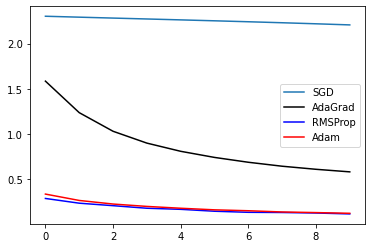

In [19]:
plt.plot(tst_loss_dict['SGD'])
plt.plot(tst_loss_dict['AdaGrad'], c='k')
plt.plot(tst_loss_dict['RMSProp'], c='b')
plt.plot(tst_loss_dict['Adam'], c='r')
plt.legend(['SGD', 'AdaGrad', 'RMSProp', 'Adam'])

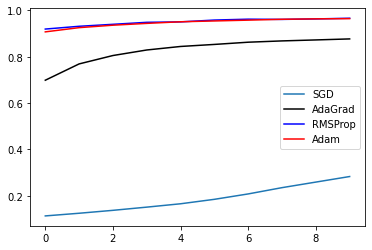

In [20]:
plt.plot(accuracy_dict['SGD'])
plt.plot(accuracy_dict['AdaGrad'], c='k')
plt.plot(accuracy_dict['RMSProp'], c='b')
plt.plot(accuracy_dict['Adam'], c='r')
plt.legend(['SGD', 'AdaGrad', 'RMSProp', 'Adam'])

# 연습문제

<span style = 'font-size:1.3em;line-height:1.5em'>1. Learning rate를 지금보다 좀 더 크게 했을 때 어떤 일이 일어나는지 관찰해봅시다. SGD, AdaGrad, RMSProp, Adam optimizer에 대해서 잘 학습이 되는지, 기존보다 학습속도는 더 빠르게 되는지 알아봅시다. </span>

In [21]:
opt_list = ['SGD', 'AdaGrad', 'RMSProp', 'Adam']
model_dict    = dict()
trn_loss_dict = dict()
tst_loss_dict = dict()
opt_dict      = dict()
accuracy_dict = dict()

for opt in opt_list:
    model_dict[opt]    = MyNet().to(device)
    trn_loss_dict[opt] = list()
    tst_loss_dict[opt] = list()
    accuracy_dict[opt] = list()

opt_dict['SGD'] = optim.SGD(model_dict['SGD'].parameters(), lr=2e-3) # learning rate 0.0002 -> 0.002
opt_dict['AdaGrad'] = optim.Adagrad(model_dict['AdaGrad'].parameters(), lr=2e-3)
opt_dict['RMSProp'] = optim.RMSprop(model_dict['RMSProp'].parameters(), lr=2e-3)
opt_dict['Adam'] = optim.Adam(model_dict['Adam'].parameters(), lr=2e-3)

In [22]:
n_epochs = 10

for opt_name, optimizer in opt_dict.items():
    for epoch in range(n_epochs):
        model_dict[opt_name].train()
        total_trn_loss = 0
        for batch_idx, (x_batch, y_batch) in enumerate(trn_loader):
            x_batch = x_batch.reshape(-1,784).to(device)
            y_batch = y_batch.to(device)
            opt_dict[opt_name].zero_grad()
            y_batch_prob = model_dict[opt_name](x_batch)
            trn_loss = F.nll_loss(y_batch_prob, y_batch)
            trn_loss.backward()
            total_trn_loss += trn_loss.item() * y_batch.shape[0]
            opt_dict[opt_name].step()
        trn_loss_dict[opt_name].append(total_trn_loss/len(trn_loader.dataset))
        
        
        
        model_dict[opt_name].eval()
        total_tst_loss=0
        correct = 0
        with torch.no_grad():
            for batch_idx, (x_batch, y_batch) in enumerate(tst_loader):
                x_batch = x_batch.reshape(-1,784).to(device)
                y_batch = y_batch.to(device)
                y_batch_prob = model_dict[opt_name](x_batch)
                y_batch_pred = torch.argmax(y_batch_prob, axis=1)
                tst_loss = F.nll_loss(y_batch_prob, y_batch)
                total_tst_loss += tst_loss.item() * y_batch.shape[0]
                correct += np.sum(y_batch.cpu().numpy() == y_batch_pred.cpu().numpy())
        tst_loss_dict[opt_name].append(total_tst_loss / len(tst_loader.dataset))
        accuracy_dict[opt_name].append(correct / len(tst_loader.dataset))
        
        # 매 epoch이 끝날때 결과 찍기
        print('Optimizer: {}, Epoch: {} \t Trn Loss: {:.6f}'.format(opt_name, epoch, 
                                                                    total_trn_loss/len(trn_loader.dataset)))
        
        print('Optimizer: {}, Epoch: {} \t Tst Loss: {:.6f}, Accuracy: {:.2f}%'.format(opt_name, epoch, 
                                                                                       total_tst_loss/len(tst_loader.dataset), 
                                                                                       100*correct/len(tst_loader.dataset)))
    

Optimizer: SGD, Epoch: 0 	 Trn Loss: 2.259199
Optimizer: SGD, Epoch: 0 	 Tst Loss: 2.203151, Accuracy: 37.60%
Optimizer: SGD, Epoch: 1 	 Trn Loss: 2.120525
Optimizer: SGD, Epoch: 1 	 Tst Loss: 2.005568, Accuracy: 62.55%
Optimizer: SGD, Epoch: 2 	 Trn Loss: 1.848696
Optimizer: SGD, Epoch: 2 	 Tst Loss: 1.646207, Accuracy: 70.51%
Optimizer: SGD, Epoch: 3 	 Trn Loss: 1.455735
Optimizer: SGD, Epoch: 3 	 Tst Loss: 1.240209, Accuracy: 75.27%
Optimizer: SGD, Epoch: 4 	 Trn Loss: 1.101677
Optimizer: SGD, Epoch: 4 	 Tst Loss: 0.943887, Accuracy: 80.34%
Optimizer: SGD, Epoch: 5 	 Trn Loss: 0.867485
Optimizer: SGD, Epoch: 5 	 Tst Loss: 0.762968, Accuracy: 82.77%
Optimizer: SGD, Epoch: 6 	 Trn Loss: 0.723786
Optimizer: SGD, Epoch: 6 	 Tst Loss: 0.650301, Accuracy: 84.39%
Optimizer: SGD, Epoch: 7 	 Trn Loss: 0.630781
Optimizer: SGD, Epoch: 7 	 Tst Loss: 0.574729, Accuracy: 85.91%
Optimizer: SGD, Epoch: 8 	 Trn Loss: 0.566490
Optimizer: SGD, Epoch: 8 	 Tst Loss: 0.520846, Accuracy: 87.26%
Optimizer:

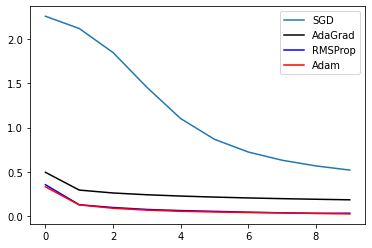

In [23]:
plt.plot(trn_loss_dict['SGD'])
plt.plot(trn_loss_dict['AdaGrad'], c='k')
plt.plot(trn_loss_dict['RMSProp'], c='b')
plt.plot(trn_loss_dict['Adam'], c='r')
plt.legend(['SGD', 'AdaGrad', 'RMSProp', 'Adam'])

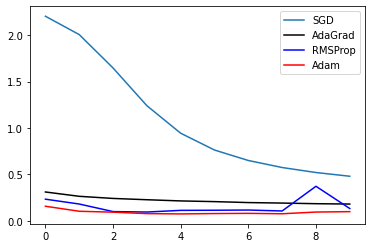

In [24]:
plt.plot(tst_loss_dict['SGD'])
plt.plot(tst_loss_dict['AdaGrad'], c='k')
plt.plot(tst_loss_dict['RMSProp'], c='b')
plt.plot(tst_loss_dict['Adam'], c='r')
plt.legend(['SGD', 'AdaGrad', 'RMSProp', 'Adam'])

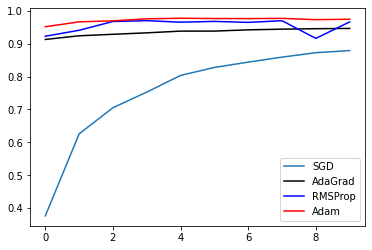

In [25]:
plt.plot(accuracy_dict['SGD'])
plt.plot(accuracy_dict['AdaGrad'], c='k')
plt.plot(accuracy_dict['RMSProp'], c='b')
plt.plot(accuracy_dict['Adam'], c='r')
plt.legend(['SGD', 'AdaGrad', 'RMSProp', 'Adam'])

# 과제

<span style = 'font-size:1.3em;line-height:1.5em'>1. Pytorch에서는 learning rate scheduler라는 기능을 제공합니다. 이는 학습이 진행될 수록 learning rate를 조절하는 기능입니다. 이 중, StepLR을 사용하여 learning rate를 조정해보세요. step_size=10, gamma=0.2, 초기 learning_rates는 0.1, optimizer는 SGD를 사용해보세요. 총 100번의 epoch을 실행하여 training_loss, test_loss, test_accuracy를 매 epoch마다 찍어보세요.</span>

참고: https://sanghyu.tistory.com/113

In [30]:
model = MyNet().to(device)

In [31]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.2)

In [32]:
n_epochs = 100
lr_list = []

for epoch in range(n_epochs):
    model.train()
    for batch_idx, (x_batch, y_batch) in enumerate(trn_loader):
        x_batch = x_batch.reshape(-1,784).to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        y_batch_prob = model(x_batch)
        loss = F.nll_loss(y_batch_prob, y_batch)
        loss.backward()
        optimizer.step()
    
        if (batch_idx+1)%100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, 
                                                                           batch_idx * len(x_batch), 
                                                                           len(trn_loader.dataset),
                                                                           100 * batch_idx / len(trn_loader),
                                                                           loss.item()))
    scheduler.step() # epoch마다 scheduler update
    lr_list.append(scheduler.get_last_lr())

    # 매 epoch이 끝날때 결과 찍기
    print('Train Epoch: {} [{}/{} (100%)]\tLoss: {:.6f}'.format(epoch, 
                                                                   len(trn_loader.dataset), 
                                                                   len(trn_loader.dataset),
                                                                loss.item()))
    model.eval()
    y_pred_list = []
    y_real_list = []
    tst_loss = 0
    with torch.no_grad():
        for batch_idx, (x_batch, y_batch) in enumerate(tst_loader):
            x_batch = x_batch.reshape(-1,784).to(device)
            y_batch = y_batch.to(device)
            y_batch_prob = model(x_batch)
            y_batch_pred = np.argmax(y_batch_prob.cpu(), axis=1)
#             print(y_batch_pred)
#             print(y_batch)
#             y_batch_pred = y_batch_prob.argmax(dim=1, keepdim=True)
            loss = F.nll_loss(y_batch_prob, y_batch, reduction='sum')
            tst_loss += loss
            
            y_pred_list.append(y_batch_pred.detach().numpy())
            y_real_list.append(y_batch.cpu().numpy())
            
        y_real = np.concatenate([x for x in y_real_list], axis=0)
        y_pred = np.concatenate([x for x in y_pred_list], axis=0)
        tst_loss /= y_real.shape[0]
        correct  = np.sum(y_real == y_pred)
        accuracy = 100*correct / len(tst_loader.dataset)
        
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(tst_loss, 
                                                                                     correct, 
                                                                                     len(tst_loader.dataset),
                                                                                     accuracy))

Train Epoch: 0 [25344/60000 (42%)]	Loss: 0.415673
Train Epoch: 0 [50944/60000 (85%)]	Loss: 0.284850
Train Epoch: 0 [60000/60000 (100%)]	Loss: 0.225967

Test set: Average loss: 0.2676, Accuracy: 9198/10000 (92%)

Train Epoch: 1 [25344/60000 (42%)]	Loss: 0.178966
Train Epoch: 1 [50944/60000 (85%)]	Loss: 0.168881
Train Epoch: 1 [60000/60000 (100%)]	Loss: 0.163060

Test set: Average loss: 0.1926, Accuracy: 9426/10000 (94%)

Train Epoch: 2 [25344/60000 (42%)]	Loss: 0.213178
Train Epoch: 2 [50944/60000 (85%)]	Loss: 0.176801
Train Epoch: 2 [60000/60000 (100%)]	Loss: 0.144906

Test set: Average loss: 0.1938, Accuracy: 9372/10000 (94%)

Train Epoch: 3 [25344/60000 (42%)]	Loss: 0.198475
Train Epoch: 3 [50944/60000 (85%)]	Loss: 0.085756
Train Epoch: 3 [60000/60000 (100%)]	Loss: 0.085604

Test set: Average loss: 0.1313, Accuracy: 9611/10000 (96%)

Train Epoch: 4 [25344/60000 (42%)]	Loss: 0.106163
Train Epoch: 4 [50944/60000 (85%)]	Loss: 0.126391
Train Epoch: 4 [60000/60000 (100%)]	Loss: 0.077946



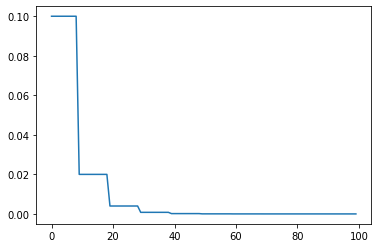

In [33]:
plt.plot(lr_list)